In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import sys
points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th

In [2]:
ene_true = -J*( th + ch*thN )/( 1 + thN )
heat_true=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
X_true = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
h=0.02
b=1/T
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M_true = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

# NSL_6

### EX6_01

In this notebook the 1D ISING MODEL is simulated using the Metropolis and the Gibbs sampling methods. Four physical quantities are measured and compared to their analytical values: mean energy $U/N$, mean heat capacity $C/N$, mean magnetization $M/N$, magnetic susceptibility $\chi$.

The hamiltonian for the 1D ISING MODEL is particulary simple:
$$ H = J \sum_i s_is_{i+1} - \frac{h}{2}\sum_i(s_i+s_{i+1}) $$
where $s_i$ is the $i-th$ spin taken to be $+1$ or $-1$, $J$ is a coupling constant higher than zero and $h$ is the external magnetic field.

The proposed move in the Metropolis algorithm is the flip of a spin. This move is accepted with probability: $$A(\nu,\mu) =  min(1, \exp(-\beta \Delta E_{\mu ->\nu}))$$
where $\Delta E$ is the energy difference between the system with the flipped spin and the initial one.

The Gibbs sampling is a particular type of Metropolis algorithm in which the proposed move is always accepted. This time the proposed move is independent of the initial condition. A spin is picked at random and then is set to $+1$ with probability
$$ p(s_{k}) = \frac{1}{1+\exp(-\beta \Delta E_{s_{k}=-1 -> s_{k}=+1})} $$
otherwise is set to $-1$. In the formula $\Delta E$ is the difference in energy of the system with the considered spin set to $+1$ and $-1$.

In the code, a Metropolis/Gibbs move consists in a number of moves described before equal to the total number of spins in the Ising Model. The size of the considered model is set to 50.

The simulation needs some initial parameters to start:
- temperature
- size of the model (=50)
- J (=1)
- h

The program was executed for 16 values of the temperature (from $0.5$ to $2.0$ in steps of $0.1$) in order to obtain the physical quantities as functions of $T$ in the chosen interval. The results were then compared to the analytical solution of the 1D Ising Model.

A single execution consists in running the program for $100$ blocks of length $10^5$. The progressive mean (blocking method) was calculated in the last twenty blocks (after equilibration). The last mean and uncertainty provided by the blocking method were taken as best estimate for the physical quantity at te considered temperature.

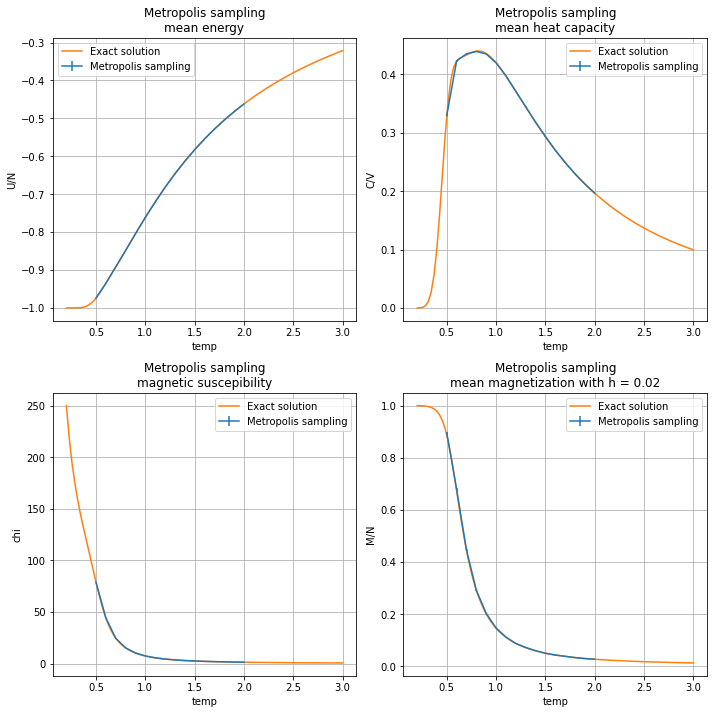

In [5]:
temp, ene, err_ene, heat, err_heat, chi, err_chi = np.loadtxt("results/enheatchi_metro.txt", usecols=(0,1,2,3,4,7,8), unpack=True)
temp, mag, err_mag = np.loadtxt("results/mag_metro.txt", usecols=(0,5,6), unpack=True)

trues = [ene_true, heat_true, X_true, M_true]
val = [ene, heat, chi, mag]
err = [err_ene, err_heat, err_chi, err_mag]
ys = ['U/N', 'C/V', 'chi','M/N']
titles = ['mean energy','mean heat capacity','magnetic suscepibility','mean magnetization with h = 0.02']

fig, axx = plt.subplots(2, 2,figsize=(10, 10))
axx = axx.reshape(-1)

for k in range(4):
    ax = axx[k]
    ax.errorbar(temp, val[k], err[k], label = 'Metropolis sampling')
    ax.plot(T, trues[k], label = 'Exact solution')
    ax.set_title("Metropolis sampling\n"+titles[k])
    ax.set_xlabel(f"temp")
    ax.set_ylabel(ys[k])
    ax.grid(True)
    ax.legend()
fig.tight_layout(pad=1.0)

These are the results for the Metropolis sampling. It is clear from the graphs that the results are compatible with the analytical curve. The graph for the mean energy, mean heat capacity and magnetic susceptibility were obtained with null external filed ($h=0$) while the mean magnetization were sampled using a simulation with $h=0.02$.

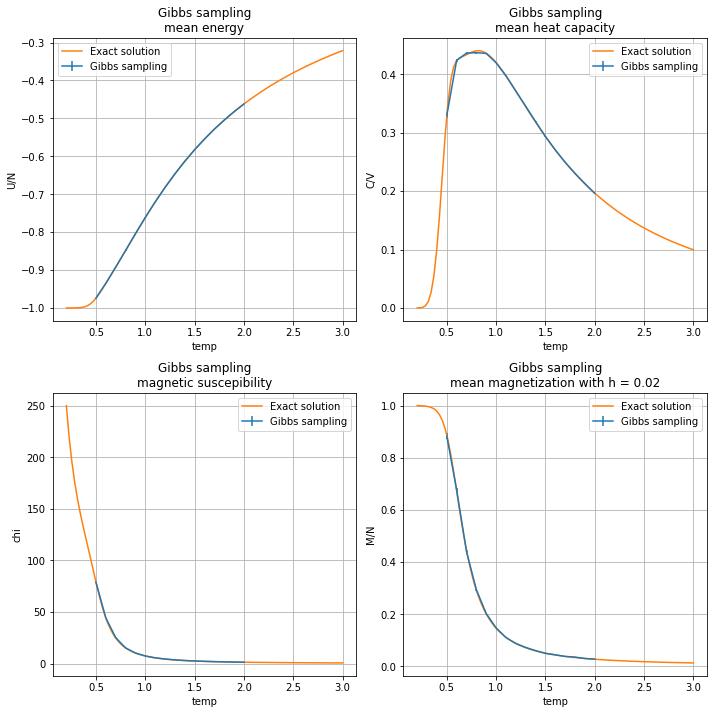

In [4]:
temp, ene, err_ene, heat, err_heat, chi, err_chi = np.loadtxt("results/enheatchi_gibbs.txt", usecols=(0,1,2,3,4,7,8), unpack=True)
temp, mag, err_mag = np.loadtxt("results/mag_gibbs.txt", usecols=(0,5,6), unpack=True)

trues = [ene_true, heat_true, X_true, M_true]
val = [ene, heat, chi, mag]
err = [err_ene, err_heat, err_chi, err_mag]
ys = ['U/N', 'C/V', 'chi','M/N']
titles = ['mean energy','mean heat capacity','magnetic suscepibility','mean magnetization with h = 0.02']

fig, axx = plt.subplots(2, 2,figsize=(10, 10))
axx = axx.reshape(-1)

for k in range(4):
    ax = axx[k]
    ax.errorbar(temp, val[k], err[k], label = 'Gibbs sampling')
    ax.plot(T, trues[k], label = 'Exact solution')
    ax.set_title("Gibbs sampling\n"+titles[k])
    ax.set_xlabel(f"temp")
    ax.set_ylabel(ys[k])
    ax.grid(True)
    ax.legend()
fig.tight_layout(pad=1.0)

Also in the case of the Gibbs sampling the results are compatible with the analytical solution. The physical quantities were sampled using the same value for the external field used in the Metropolis algorithm.

In conclusion, no significant difference between the two sampling methods were observed. In particular, both approximate the analytical curve well.